### **Mini Project 01**- *W.M.NIPUNI SANDUNIKA (199984810186)*

In [88]:
import os
import pandas as pd
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
from sklearn.model_selection import train_test_split


In [89]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [90]:
os.chdir("/content/drive/My Drive/Deep Learning/Sinhala_Letters/")
os.getcwd()

'/content/drive/My Drive/Deep Learning/Sinhala_Letters'

In [91]:
path = "/content/drive/My Drive/Deep Learning/Sinhala_Letters/"
files = os.listdir(path)
categories = []

for filename in files:
  category = filename.split('.')[0]
  if category == 'na':
    categories.append(1)
  elif category == 'sh':
    categories.append(0)
  else: pass
df = pd.DataFrame({
    'filename':files,
    'category':categories
    })



In [92]:
df

,filename,category
0,na.22.png,1
1,na.20.png,1
2,na.21.png,1
3,na.19.png,1
4,na.2.png,1
...,...,...
95,sh.31.png,0
96,sh.32.png,0
97,sh.30.png,0
98,sh.3.png,0


In [93]:
img = plt.imread('na.1.png')

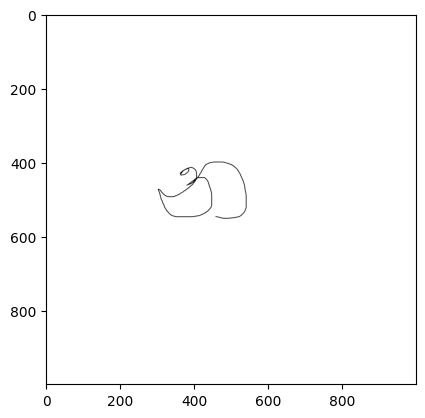

In [94]:
plt.imshow(img)

In [95]:
# Load and preprocess the data
data = []
for index, row in df.iterrows():
    img_path = os.path.join(path, row['filename'])
    img = load_img(img_path, target_size=(100, 100))  # Adjust target_size as needed
    img_array = img_to_array(img)
    img_array /= 255.0  # Normalize pixel values
    data.append(img_array)

x = np.array(data)
y = df['category'].values

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)


### **Define and compile your CNN model**

In [96]:
model = Sequential([
    Conv2D(32,(3,3), activation ='relu', input_shape = (100,100,3)),
    MaxPooling2D((2,2)),

    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(64,activation = 'sigmoid'),
    Dense(1,activation = 'sigmoid')

])

In [97]:
model = Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(100,100,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64,activation ='sigmoid'))
model.add(Dense(1,activation='sigmoid'))


In [98]:
model.compile(loss='binary_crossentropy',optimizer = 'adam',metrics =['accuracy'])

### **Train the model**

In [99]:
model.fit(x_train, y_train, epochs=5, batch_size=64)


Epoch 1/5
1/1 [==============================] - 2s 2s/step - loss: 0.7642 - accuracy: 0.5167
Epoch 2/5
1/1 [==============================] - 1s 518ms/step - loss: 1.9717 - accuracy: 0.4833
Epoch 3/5
1/1 [==============================] - 1s 500ms/step - loss: 1.9491 - accuracy: 0.4833
Epoch 4/5
1/1 [==============================] - 1s 505ms/step - loss: 1.5730 - accuracy: 0.4833
Epoch 5/5
1/1 [==============================] - 1s 503ms/step - loss: 0.8885 - accuracy: 0.4833


In [100]:
model.evaluate(x_test,y_test)

2/2 [==============================] - 0s 27ms/step - loss: 0.7937 - accuracy: 0.4750


[0.7936884164810181, 0.4749999940395355]

### **Testing Sample Data**

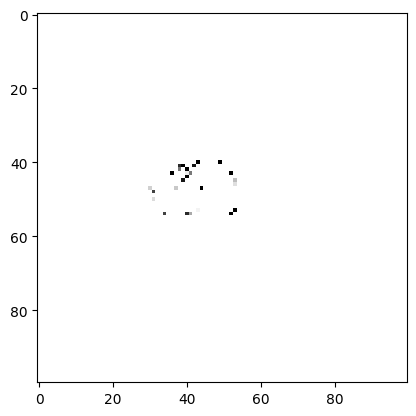

1/1 [==============================] - 0s 156ms/step
Our model says the letter is: na


In [101]:
# Select a random sample from the test set
idx2 = random.randint(0, len(y_test) - 1)

# Display the image
plt.imshow(x_test[idx2])
plt.show()

# Make a prediction
y_pred = model.predict(x_test[idx2].reshape(1, 100, 100, 3))
prediction_threshold = 0.5

# Check the predicted class
if y_pred[0, 0] > prediction_threshold:
    pred = 'na'
else:
    pred = 'sh'



# Display the true label
true_label = 'na' if y_test[idx2] == 1 else 'sh'
print("Our model says the letter is:", true_label)





In [102]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predictions on the entire test set
y_pred = model.predict(x_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Evaluate and print performance metrics
print("Accuracy:", accuracy_score(y_test, y_pred_binary))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_binary))
print("Classification Report:\n", classification_report(y_test, y_pred_binary))


2/2 [==============================] - 0s 25ms/step
Accuracy: 0.475
Confusion Matrix:
 [[ 0 21]
 [ 0 19]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.47      1.00      0.64        19

    accuracy                           0.48        40
   macro avg       0.24      0.50      0.32        40
weighted avg       0.23      0.47      0.31        40



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
